Name: **Luong Nguyen**  
Student ID: **1504210**  

# Introduction to Deep Learning 

## Session06: reuters newswires classification
____
From Chollet's book chapter 3.6, his dense network achieved an accuracy of ~78%. Let's see if our RNNs could perform better.

## Import the packages needed for this assignment

In [1]:
# install keras on google colab
!pip install -q keras
# is GPU working?
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, LSTM, Bidirectional
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical

## Prepare data

### Load data

In [0]:
from keras.datasets import reuters

max_features = 1000 # number of words to consider as features
maxlen = 100  # cut texts after this number of words (among top max_features most common words)

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features, maxlen=maxlen)

### Preprocess data

In [67]:
# pad sequence
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# one-hot encode labels
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))

x_train shape: (4777, 100)
y_train shape: (4777, 46)
x_test shape: (1195, 100)
y_test shape: (1195, 46)


## Using Embedding layer

In [0]:
def plot(hist):
  """
  Plot the training/validation loss/accuracy graphs  
  """
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1, len(loss) + 1)

  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

  acc = hist.history['acc']
  val_acc = hist.history['val_acc']

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Acc')
  plt.legend()
  plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 100, 32)           32000     
_________________________________________________________________
flatten_7 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 46)                147246    
Total params: 179,246
Trainable params: 179,246
Non-trainable params: 0
_________________________________________________________________
Train on 4777 samples, validate on 1195 samples
Epoch 1/15
4777/4777 [==============================] - 3s 566us/step - loss: 1.6254 - acc: 0.6165 - val_loss: 1.3089 - val_acc: 0.6912
Epoch 2/15
4777/4777 [==============================] - 1s 171us/step - loss: 1.1252 - acc: 0.7157 - val_loss: 1.1351 - val_acc: 0.7314
Epoch 3/15
4777/4777 [==============================] - 1s 172us/step - loss: 0.

4777/4777 [==============================] - 1s 176us/step - loss: 0.4130 - acc: 0.9202 - val_loss: 0.9526 - val_acc: 0.7916
Epoch 7/15
4777/4777 [==============================] - 1s 173us/step - loss: 0.3081 - acc: 0.9429 - val_loss: 0.9611 - val_acc: 0.7916
Epoch 8/15
4777/4777 [==============================] - 1s 176us/step - loss: 0.2376 - acc: 0.9483 - val_loss: 0.9806 - val_acc: 0.7933
Epoch 9/15
4777/4777 [==============================] - 1s 177us/step - loss: 0.1936 - acc: 0.9550 - val_loss: 1.0207 - val_acc: 0.7925
Epoch 10/15
4777/4777 [==============================] - 1s 175us/step - loss: 0.1656 - acc: 0.9556 - val_loss: 1.0260 - val_acc: 0.7883
Epoch 11/15
4777/4777 [==============================] - 1s 176us/step - loss: 0.1462 - acc: 0.9586 - val_loss: 1.0402 - val_acc: 0.7891
Epoch 12/15
4777/4777 [==============================] - 1s 172us/step - loss: 0.1307 - acc: 0.9594 - val_loss: 1.0731 - val_acc: 0.7925
Epoch 13/15
4777/4777 [==============================] -

4777/4777 [==============================] - 1s 180us/step - loss: 0.1101 - acc: 0.9596 - val_loss: 1.1509 - val_acc: 0.7933


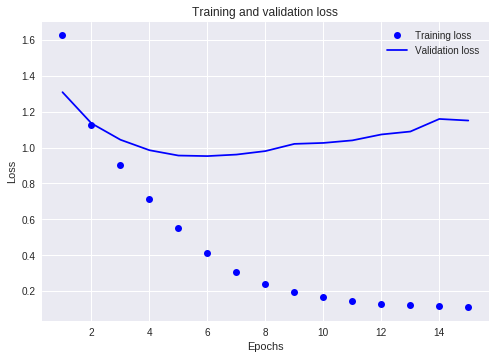

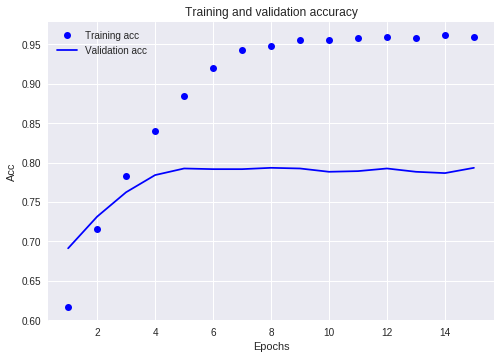

In [69]:
model = Sequential()

model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test))

plot(history)

With a single Embedding layer, we achieved ~79% accuracy, about Chollet's dense network performance. However, this model overfitted after a few epochs. Next, we will add RNN layers on top of the Embedding layer.

## SimpleRNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_22 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 46)                1518      
Total params: 35,598
Trainable params: 35,598
Non-trainable params: 0
_________________________________________________________________
Train on 4777 samples, validate on 1195 samples
Epoch 1/40
4777/4777 [==============================] - 4s 909us/step - loss: 3.3303 - acc: 0.3542 - val_loss: 2.7704 - val_acc: 0.5088
Epoch 2/40
4777/4777 [==============================] - 2s 449us/step - loss: 2.3503 - acc: 0.4955 - val_loss: 1.9789 - val_acc: 0.5138
Epoch 3/40
3200/4777 [===================>..........] - ETA: 0s - loss: 1.9535 - a

4777/4777 [==============================] - 2s 458us/step - loss: 1.9336 - acc: 0.4965 - val_loss: 1.8208 - val_acc: 0.5146
Epoch 4/40
4777/4777 [==============================] - 2s 457us/step - loss: 1.7504 - acc: 0.5152 - val_loss: 1.7455 - val_acc: 0.5222
Epoch 5/40
4777/4777 [==============================] - 2s 457us/step - loss: 1.5488 - acc: 0.6439 - val_loss: 1.7431 - val_acc: 0.5247
Epoch 6/40
4777/4777 [==============================] - 2s 456us/step - loss: 1.4278 - acc: 0.6688 - val_loss: 1.4282 - val_acc: 0.6762
Epoch 7/40
4777/4777 [==============================] - 2s 463us/step - loss: 1.3273 - acc: 0.6864 - val_loss: 1.3838 - val_acc: 0.6954
Epoch 8/40
4777/4777 [==============================] - 2s 449us/step - loss: 1.2848 - acc: 0.6841 - val_loss: 1.3151 - val_acc: 0.6962
Epoch 9/40
 896/4777 [====>.........................] - ETA: 1s - loss: 1.2095 - acc: 0.7031

4777/4777 [==============================] - 2s 448us/step - loss: 1.1967 - acc: 0.7088 - val_loss: 1.2575 - val_acc: 0.7172
Epoch 10/40
4777/4777 [==============================] - 2s 458us/step - loss: 1.1519 - acc: 0.7260 - val_loss: 1.3098 - val_acc: 0.6979
Epoch 11/40
4777/4777 [==============================] - 2s 454us/step - loss: 1.0889 - acc: 0.7356 - val_loss: 1.3826 - val_acc: 0.6954
Epoch 12/40
4777/4777 [==============================] - 2s 455us/step - loss: 1.0548 - acc: 0.7513 - val_loss: 1.3404 - val_acc: 0.7046
Epoch 13/40
4777/4777 [==============================] - 2s 457us/step - loss: 1.0261 - acc: 0.7540 - val_loss: 1.2531 - val_acc: 0.7054
Epoch 14/40
4777/4777 [==============================] - 2s 452us/step - loss: 0.9809 - acc: 0.7628 - val_loss: 1.1949 - val_acc: 0.7364
Epoch 15/40
 512/4777 [==>...........................] - ETA: 1s - loss: 1.0399 - acc: 0.7500

4777/4777 [==============================] - 2s 451us/step - loss: 0.9661 - acc: 0.7666 - val_loss: 1.2244 - val_acc: 0.7280
Epoch 16/40
4777/4777 [==============================] - 2s 456us/step - loss: 0.9291 - acc: 0.7729 - val_loss: 1.2474 - val_acc: 0.7079
Epoch 17/40
4777/4777 [==============================] - 2s 457us/step - loss: 0.8968 - acc: 0.7810 - val_loss: 1.2239 - val_acc: 0.7172
Epoch 18/40
4777/4777 [==============================] - 2s 455us/step - loss: 0.8661 - acc: 0.7873 - val_loss: 1.3110 - val_acc: 0.6879
Epoch 19/40
4777/4777 [==============================] - 2s 450us/step - loss: 0.8476 - acc: 0.7909 - val_loss: 1.2258 - val_acc: 0.7280
Epoch 20/40
4777/4777 [==============================] - 2s 459us/step - loss: 0.8077 - acc: 0.8020 - val_loss: 1.5679 - val_acc: 0.6151
Epoch 21/40
 768/4777 [===>..........................] - ETA: 1s - loss: 0.8072 - acc: 0.7904

4777/4777 [==============================] - 2s 453us/step - loss: 0.7930 - acc: 0.8062 - val_loss: 1.2494 - val_acc: 0.7272
Epoch 22/40
4777/4777 [==============================] - 2s 456us/step - loss: 0.7628 - acc: 0.8141 - val_loss: 1.2823 - val_acc: 0.7071
Epoch 23/40
4777/4777 [==============================] - 2s 449us/step - loss: 0.7356 - acc: 0.8225 - val_loss: 1.3697 - val_acc: 0.6820
Epoch 24/40
4777/4777 [==============================] - 2s 449us/step - loss: 0.7224 - acc: 0.8265 - val_loss: 1.2304 - val_acc: 0.7339
Epoch 25/40
4777/4777 [==============================] - 2s 456us/step - loss: 0.7086 - acc: 0.8239 - val_loss: 1.2862 - val_acc: 0.7155
Epoch 26/40
4777/4777 [==============================] - 2s 447us/step - loss: 0.6654 - acc: 0.8367 - val_loss: 1.2515 - val_acc: 0.7339
Epoch 27/40
 640/4777 [===>..........................] - ETA: 1s - loss: 0.6407 - acc: 0.8484

4777/4777 [==============================] - 2s 459us/step - loss: 0.6497 - acc: 0.8438 - val_loss: 1.2969 - val_acc: 0.7305
Epoch 28/40
4777/4777 [==============================] - 2s 445us/step - loss: 0.6316 - acc: 0.8480 - val_loss: 1.3209 - val_acc: 0.7096
Epoch 29/40
4777/4777 [==============================] - 2s 446us/step - loss: 0.6064 - acc: 0.8562 - val_loss: 1.2927 - val_acc: 0.7339
Epoch 30/40
4777/4777 [==============================] - 2s 458us/step - loss: 0.5884 - acc: 0.8572 - val_loss: 1.3093 - val_acc: 0.7364
Epoch 31/40
4777/4777 [==============================] - 2s 459us/step - loss: 0.5713 - acc: 0.8637 - val_loss: 1.3664 - val_acc: 0.7146
Epoch 32/40
4777/4777 [==============================] - 2s 456us/step - loss: 0.5535 - acc: 0.8692 - val_loss: 1.4207 - val_acc: 0.7356
Epoch 33/40
 384/4777 [=>............................] - ETA: 1s - loss: 0.6514 - acc: 0.8464

4777/4777 [==============================] - 2s 449us/step - loss: 0.5340 - acc: 0.8750 - val_loss: 1.3671 - val_acc: 0.7238
Epoch 34/40
4777/4777 [==============================] - 2s 456us/step - loss: 0.5171 - acc: 0.8811 - val_loss: 1.4196 - val_acc: 0.6996
Epoch 35/40
4777/4777 [==============================] - 2s 447us/step - loss: 0.5094 - acc: 0.8759 - val_loss: 1.3928 - val_acc: 0.7272
Epoch 36/40
4777/4777 [==============================] - 2s 448us/step - loss: 0.4858 - acc: 0.8861 - val_loss: 1.3921 - val_acc: 0.7205
Epoch 37/40
4777/4777 [==============================] - 2s 455us/step - loss: 0.4814 - acc: 0.8855 - val_loss: 1.4577 - val_acc: 0.7289
Epoch 38/40
4777/4777 [==============================] - 2s 447us/step - loss: 0.4614 - acc: 0.8867 - val_loss: 1.4418 - val_acc: 0.7381
Epoch 39/40
 640/4777 [===>..........................] - ETA: 1s - loss: 0.4682 - acc: 0.8844

4777/4777 [==============================] - 2s 449us/step - loss: 0.4511 - acc: 0.8914 - val_loss: 1.4326 - val_acc: 0.7021
Epoch 40/40
4777/4777 [==============================] - 2s 449us/step - loss: 0.4371 - acc: 0.8972 - val_loss: 1.4978 - val_acc: 0.6879


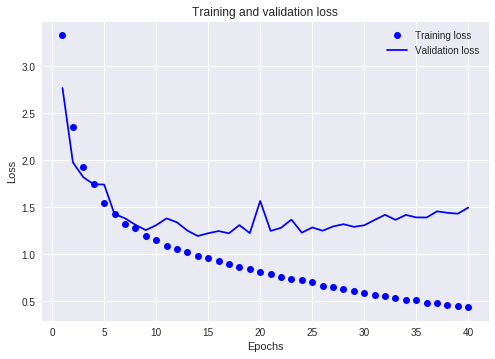

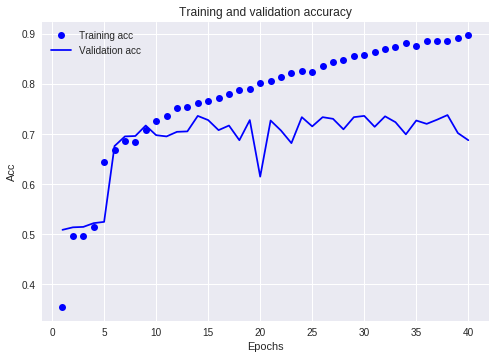

In [71]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=128,
                    validation_data=(x_test, y_test))

plot(history)

With a single SimpleRNN layer, `val_acc` actually decreased and we only got ~73% accuracy. However, this models started overfitting later than the previous one. Next we will try stacking some SimpleRNN layers. 

## Stacking SimpleRNN layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_23 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_24 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_25 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_26 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_42 (Dense)             (None, 46)                1518      
Total params: 41,838
Trainable params: 41,838
Non-trainable params: 0
_________________________________________________________________
Train 

4777/4777 [==============================] - 7s 2ms/step - loss: 1.6181 - acc: 0.6584 - val_loss: 1.4898 - val_acc: 0.6803
Epoch 3/20
4777/4777 [==============================] - 7s 2ms/step - loss: 1.4454 - acc: 0.6820 - val_loss: 1.4134 - val_acc: 0.7004
Epoch 4/20
4777/4777 [==============================] - 7s 2ms/step - loss: 1.3741 - acc: 0.6931 - val_loss: 1.4024 - val_acc: 0.6946
Epoch 5/20
4777/4777 [==============================] - 7s 2ms/step - loss: 1.3232 - acc: 0.6965 - val_loss: 1.3728 - val_acc: 0.6987
Epoch 6/20
4777/4777 [==============================] - 7s 1ms/step - loss: 1.2243 - acc: 0.7132 - val_loss: 1.3764 - val_acc: 0.6753
Epoch 7/20
4777/4777 [==============================] - 7s 2ms/step - loss: 1.1249 - acc: 0.7312 - val_loss: 1.2848 - val_acc: 0.7121
Epoch 8/20
1024/4777 [=====>........................] - ETA: 5s - loss: 1.0387 - acc: 0.7568

4777/4777 [==============================] - 7s 2ms/step - loss: 1.0111 - acc: 0.7637 - val_loss: 1.2672 - val_acc: 0.7238
Epoch 9/20
4777/4777 [==============================] - 7s 2ms/step - loss: 0.9279 - acc: 0.7833 - val_loss: 1.2502 - val_acc: 0.7230
Epoch 10/20
4777/4777 [==============================] - 7s 2ms/step - loss: 0.8449 - acc: 0.8011 - val_loss: 1.3249 - val_acc: 0.7029
Epoch 11/20
4777/4777 [==============================] - 7s 1ms/step - loss: 0.7726 - acc: 0.8162 - val_loss: 1.2742 - val_acc: 0.7289
Epoch 12/20
4777/4777 [==============================] - 7s 2ms/step - loss: 0.7213 - acc: 0.8267 - val_loss: 1.2474 - val_acc: 0.7356
Epoch 13/20
4777/4777 [==============================] - 7s 2ms/step - loss: 0.6671 - acc: 0.8396 - val_loss: 1.3587 - val_acc: 0.6937
Epoch 14/20
 640/4777 [===>..........................] - ETA: 5s - loss: 0.6757 - acc: 0.8484

4777/4777 [==============================] - 7s 2ms/step - loss: 0.6114 - acc: 0.8581 - val_loss: 1.2782 - val_acc: 0.7339
Epoch 15/20
4777/4777 [==============================] - 7s 2ms/step - loss: 0.5736 - acc: 0.8631 - val_loss: 1.2796 - val_acc: 0.7255
Epoch 16/20
4777/4777 [==============================] - 7s 2ms/step - loss: 0.5308 - acc: 0.8754 - val_loss: 1.3305 - val_acc: 0.7172
Epoch 17/20
4777/4777 [==============================] - 7s 2ms/step - loss: 0.4915 - acc: 0.8859 - val_loss: 1.3953 - val_acc: 0.7121
Epoch 18/20
4777/4777 [==============================] - 7s 2ms/step - loss: 0.4565 - acc: 0.8901 - val_loss: 1.3571 - val_acc: 0.7079
Epoch 19/20
4777/4777 [==============================] - 7s 2ms/step - loss: 0.4302 - acc: 0.8978 - val_loss: 1.3572 - val_acc: 0.7205
Epoch 20/20
 640/4777 [===>..........................] - ETA: 5s - loss: 0.3996 - acc: 0.9078

4777/4777 [==============================] - 7s 2ms/step - loss: 0.3997 - acc: 0.9077 - val_loss: 1.3696 - val_acc: 0.7297


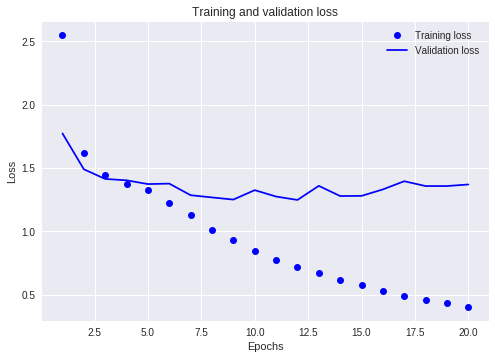

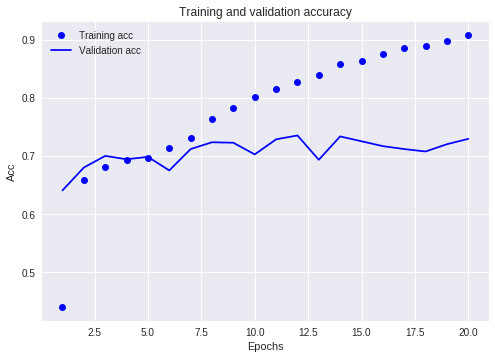

In [72]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_test, y_test))

plot(history)

Stacking SimpleRNN layers did not help significantly in this case. We will move on to use LSTM instead of SimpleRNN.

## LSTM

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, None, 32)          32000     
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_43 (Dense)             (None, 46)                1518      
Total params: 41,838
Trainable params: 41,838
Non-trainable params: 0
_________________________________________________________________
Train on 4777 samples, validate on 1195 samples
Epoch 1/40
4777/4777 [==============================] - 10s 2ms/step - loss: 2.5946 - acc: 0.4788 - val_loss: 1.9530 - val_acc: 0.5146
Epoch 2/40
4777/4777 [==============================] - 7s 2ms/step - loss: 1.8669 - acc: 0.5072 - val_loss: 1.6831 - val_acc: 0.5146
Epoch 3/40
2944/4777 [=================>............] - ETA: 2s - loss: 1.6618 - acc:

4777/4777 [==============================] - 7s 2ms/step - loss: 1.6344 - acc: 0.6104 - val_loss: 1.4951 - val_acc: 0.6954
Epoch 4/40
4777/4777 [==============================] - 7s 2ms/step - loss: 1.4573 - acc: 0.6684 - val_loss: 1.4098 - val_acc: 0.6628
Epoch 5/40
4777/4777 [==============================] - 7s 2ms/step - loss: 1.4279 - acc: 0.6282 - val_loss: 1.3324 - val_acc: 0.6971
Epoch 6/40
4777/4777 [==============================] - 7s 1ms/step - loss: 1.2989 - acc: 0.6785 - val_loss: 1.2487 - val_acc: 0.6971
Epoch 7/40
4777/4777 [==============================] - 7s 1ms/step - loss: 1.2481 - acc: 0.6728 - val_loss: 1.2906 - val_acc: 0.6351
Epoch 8/40
4777/4777 [==============================] - 7s 1ms/step - loss: 1.2122 - acc: 0.6793 - val_loss: 1.2954 - val_acc: 0.6996
Epoch 9/40
 896/4777 [====>.........................] - ETA: 5s - loss: 1.2598 - acc: 0.6685

4777/4777 [==============================] - 7s 2ms/step - loss: 1.1993 - acc: 0.6812 - val_loss: 1.1931 - val_acc: 0.7079
Epoch 10/40
4777/4777 [==============================] - 7s 1ms/step - loss: 1.1586 - acc: 0.6971 - val_loss: 1.2024 - val_acc: 0.7222
Epoch 11/40
4777/4777 [==============================] - 7s 2ms/step - loss: 1.1330 - acc: 0.7120 - val_loss: 1.4365 - val_acc: 0.6033
Epoch 12/40
4777/4777 [==============================] - 7s 2ms/step - loss: 1.1305 - acc: 0.7069 - val_loss: 1.1499 - val_acc: 0.7213
Epoch 13/40
4777/4777 [==============================] - 7s 2ms/step - loss: 1.0923 - acc: 0.7184 - val_loss: 1.1462 - val_acc: 0.7163
Epoch 14/40
4777/4777 [==============================] - 7s 2ms/step - loss: 1.0784 - acc: 0.7182 - val_loss: 1.2143 - val_acc: 0.6753
Epoch 15/40
 640/4777 [===>..........................] - ETA: 5s - loss: 1.0643 - acc: 0.7250

4777/4777 [==============================] - 7s 1ms/step - loss: 1.0537 - acc: 0.7268 - val_loss: 1.2429 - val_acc: 0.7155
Epoch 16/40
4777/4777 [==============================] - 7s 2ms/step - loss: 1.0312 - acc: 0.7331 - val_loss: 1.1256 - val_acc: 0.7289
Epoch 17/40
4777/4777 [==============================] - 7s 2ms/step - loss: 1.0146 - acc: 0.7379 - val_loss: 1.1380 - val_acc: 0.7364
Epoch 18/40
4777/4777 [==============================] - 7s 2ms/step - loss: 1.0093 - acc: 0.7425 - val_loss: 1.1662 - val_acc: 0.7255
Epoch 19/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.9845 - acc: 0.7534 - val_loss: 1.1195 - val_acc: 0.7381
Epoch 20/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.9636 - acc: 0.7588 - val_loss: 1.1304 - val_acc: 0.7381
Epoch 21/40
 512/4777 [==>...........................] - ETA: 5s - loss: 0.8596 - acc: 0.8047

4777/4777 [==============================] - 7s 2ms/step - loss: 0.9425 - acc: 0.7651 - val_loss: 1.1077 - val_acc: 0.7498
Epoch 22/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.9253 - acc: 0.7689 - val_loss: 1.1299 - val_acc: 0.7481
Epoch 23/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.9033 - acc: 0.7729 - val_loss: 1.1056 - val_acc: 0.7490
Epoch 24/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.8913 - acc: 0.7756 - val_loss: 1.0742 - val_acc: 0.7531
Epoch 25/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.8732 - acc: 0.7808 - val_loss: 1.0604 - val_acc: 0.7615
Epoch 26/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.8632 - acc: 0.7848 - val_loss: 1.0959 - val_acc: 0.7531
Epoch 27/40
 640/4777 [===>..........................] - ETA: 5s - loss: 0.7986 - acc: 0.8016

4777/4777 [==============================] - 7s 2ms/step - loss: 0.8402 - acc: 0.7884 - val_loss: 1.1044 - val_acc: 0.7573
Epoch 28/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.8201 - acc: 0.7949 - val_loss: 1.1426 - val_acc: 0.7289
Epoch 29/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.8114 - acc: 0.7988 - val_loss: 1.0928 - val_acc: 0.7632
Epoch 30/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.8044 - acc: 0.7992 - val_loss: 1.0465 - val_acc: 0.7498
Epoch 31/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.7828 - acc: 0.8055 - val_loss: 1.1079 - val_acc: 0.7406
Epoch 32/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.7768 - acc: 0.8080 - val_loss: 1.0810 - val_acc: 0.7515
Epoch 33/40
 640/4777 [===>..........................] - ETA: 5s - loss: 0.7704 - acc: 0.8172

4777/4777 [==============================] - 7s 2ms/step - loss: 0.7578 - acc: 0.8126 - val_loss: 1.0841 - val_acc: 0.7540
Epoch 34/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.7523 - acc: 0.8187 - val_loss: 1.0687 - val_acc: 0.7732
Epoch 35/40
4777/4777 [==============================] - 7s 1ms/step - loss: 0.7320 - acc: 0.8204 - val_loss: 1.0069 - val_acc: 0.7699
Epoch 36/40
4777/4777 [==============================] - 7s 1ms/step - loss: 0.7155 - acc: 0.8252 - val_loss: 1.0265 - val_acc: 0.7799
Epoch 37/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.7104 - acc: 0.8263 - val_loss: 1.1095 - val_acc: 0.7448
Epoch 38/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.7000 - acc: 0.8329 - val_loss: 1.0607 - val_acc: 0.7523
Epoch 39/40
 640/4777 [===>..........................] - ETA: 5s - loss: 0.7044 - acc: 0.8359

4777/4777 [==============================] - 7s 2ms/step - loss: 0.6914 - acc: 0.8340 - val_loss: 1.0018 - val_acc: 0.7774
Epoch 40/40
4777/4777 [==============================] - 7s 2ms/step - loss: 0.6810 - acc: 0.8390 - val_loss: 1.0091 - val_acc: 0.7782


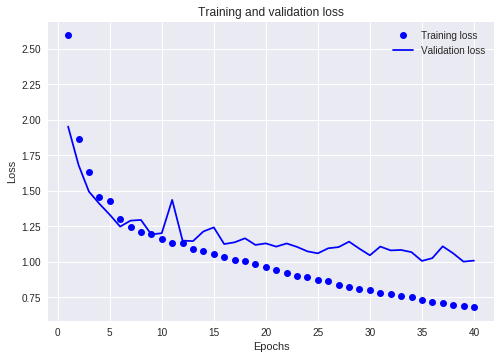

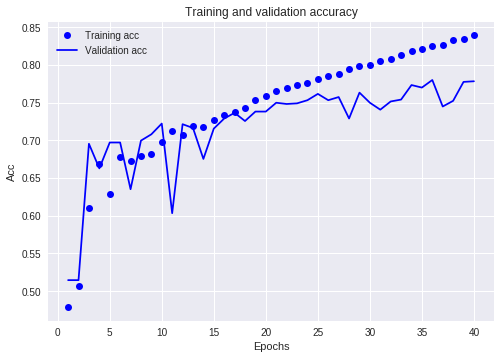

In [73]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=128,
                    validation_data=(x_test, y_test))

plot(history)

With LSTM, we achieved an accuracy of ~78% after 40 epochs. This model is less overfitting than the previous models. Lastly, we will use bidirectional RNN to see if it performs better than the one-direction RNN in this problem.

## Using bidirectional RNNs

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, None, 32)          32000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_44 (Dense)             (None, 46)                2990      
Total params: 51,630
Trainable params: 51,630
Non-trainable params: 0
_________________________________________________________________
Train on 4777 samples, validate on 1195 samples
Epoch 1/40
4777/4777 [==============================] - 16s 3ms/step - loss: 2.3690 - acc: 0.4993 - val_loss: 1.8340 - val_acc: 0.5172
Epoch 2/40
4777/4777 [==============================] - 13s 3ms/step - loss: 1.6705 - acc: 0.5759 - val_loss: 1.5626 - val_acc: 0.6092
Epoch 3/40
2816/4777 [================>.............] - ETA: 5s - loss: 1.4546 - acc

4777/4777 [==============================] - 13s 3ms/step - loss: 1.4170 - acc: 0.6785 - val_loss: 1.3151 - val_acc: 0.7013
Epoch 4/40
4777/4777 [==============================] - 13s 3ms/step - loss: 1.3353 - acc: 0.6801 - val_loss: 1.2962 - val_acc: 0.7004
Epoch 5/40
4777/4777 [==============================] - 13s 3ms/step - loss: 1.2644 - acc: 0.6896 - val_loss: 1.2098 - val_acc: 0.7054
Epoch 6/40
4777/4777 [==============================] - 13s 3ms/step - loss: 1.2235 - acc: 0.6877 - val_loss: 1.1972 - val_acc: 0.7038
Epoch 7/40
4777/4777 [==============================] - 13s 3ms/step - loss: 1.1930 - acc: 0.6940 - val_loss: 1.1679 - val_acc: 0.7121
Epoch 8/40
4777/4777 [==============================] - 13s 3ms/step - loss: 1.1472 - acc: 0.7126 - val_loss: 1.1865 - val_acc: 0.7230
Epoch 9/40
 384/4777 [=>............................] - ETA: 11s - loss: 1.2675 - acc: 0.6849

4777/4777 [==============================] - 13s 3ms/step - loss: 1.1182 - acc: 0.7308 - val_loss: 1.1438 - val_acc: 0.7331
Epoch 10/40
4777/4777 [==============================] - 13s 3ms/step - loss: 1.0934 - acc: 0.7254 - val_loss: 1.2453 - val_acc: 0.7180
Epoch 11/40
4777/4777 [==============================] - 13s 3ms/step - loss: 1.0686 - acc: 0.7358 - val_loss: 1.1288 - val_acc: 0.7314
Epoch 12/40
4777/4777 [==============================] - 13s 3ms/step - loss: 1.0593 - acc: 0.7270 - val_loss: 1.1300 - val_acc: 0.7255
Epoch 13/40
4777/4777 [==============================] - 13s 3ms/step - loss: 1.0234 - acc: 0.7425 - val_loss: 1.1716 - val_acc: 0.7088
Epoch 14/40
4777/4777 [==============================] - 13s 3ms/step - loss: 1.0119 - acc: 0.7438 - val_loss: 1.1134 - val_acc: 0.7339
Epoch 15/40
 128/4777 [..............................] - ETA: 11s - loss: 0.8627 - acc: 0.7812

4777/4777 [==============================] - 13s 3ms/step - loss: 0.9854 - acc: 0.7446 - val_loss: 1.1245 - val_acc: 0.7264
Epoch 16/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.9626 - acc: 0.7513 - val_loss: 1.0939 - val_acc: 0.7289
Epoch 17/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.9391 - acc: 0.7561 - val_loss: 1.2581 - val_acc: 0.7297
Epoch 18/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.9391 - acc: 0.7632 - val_loss: 1.0758 - val_acc: 0.7523
Epoch 19/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.9074 - acc: 0.7687 - val_loss: 1.0649 - val_acc: 0.7582
Epoch 20/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.8935 - acc: 0.7735 - val_loss: 1.1697 - val_acc: 0.7397
Epoch 21/40


4777/4777 [==============================] - 13s 3ms/step - loss: 0.8814 - acc: 0.7762 - val_loss: 1.0736 - val_acc: 0.7523
Epoch 22/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.8609 - acc: 0.7819 - val_loss: 1.0726 - val_acc: 0.7548
Epoch 23/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.8416 - acc: 0.7831 - val_loss: 1.0564 - val_acc: 0.7515
Epoch 24/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.8270 - acc: 0.7867 - val_loss: 1.0282 - val_acc: 0.7632
Epoch 25/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.8094 - acc: 0.7898 - val_loss: 1.0448 - val_acc: 0.7623
Epoch 26/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.7939 - acc: 0.7953 - val_loss: 1.0071 - val_acc: 0.7607
Epoch 27/40


4777/4777 [==============================] - 13s 3ms/step - loss: 0.7730 - acc: 0.8003 - val_loss: 1.0061 - val_acc: 0.7590
Epoch 28/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.7568 - acc: 0.8013 - val_loss: 0.9931 - val_acc: 0.7715
Epoch 29/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.7402 - acc: 0.8087 - val_loss: 1.0191 - val_acc: 0.7682
Epoch 30/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.7259 - acc: 0.8147 - val_loss: 0.9752 - val_acc: 0.7782
Epoch 31/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.7018 - acc: 0.8168 - val_loss: 0.9882 - val_acc: 0.7849
Epoch 32/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.6809 - acc: 0.8263 - val_loss: 0.9796 - val_acc: 0.7724
Epoch 33/40


4777/4777 [==============================] - 13s 3ms/step - loss: 0.6788 - acc: 0.8265 - val_loss: 1.0133 - val_acc: 0.7791
Epoch 34/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.6619 - acc: 0.8332 - val_loss: 0.9757 - val_acc: 0.7749
Epoch 35/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.6627 - acc: 0.8348 - val_loss: 0.9858 - val_acc: 0.7808
Epoch 36/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.6322 - acc: 0.8436 - val_loss: 0.9611 - val_acc: 0.7900
Epoch 37/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.6233 - acc: 0.8438 - val_loss: 1.0473 - val_acc: 0.7640
Epoch 38/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.6118 - acc: 0.8468 - val_loss: 1.0053 - val_acc: 0.7849
Epoch 39/40


4777/4777 [==============================] - 13s 3ms/step - loss: 0.6024 - acc: 0.8476 - val_loss: 0.9698 - val_acc: 0.7858
Epoch 40/40
4777/4777 [==============================] - 13s 3ms/step - loss: 0.5789 - acc: 0.8533 - val_loss: 0.9533 - val_acc: 0.7958


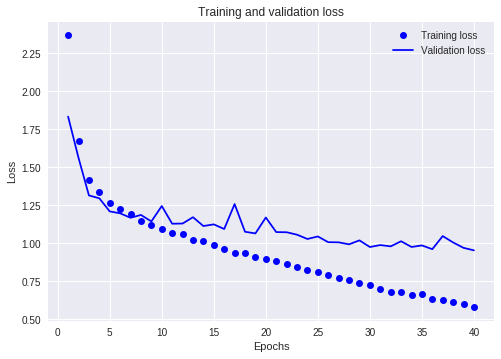

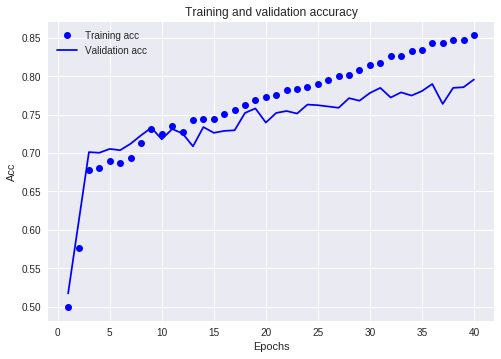

In [74]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=128,
                    validation_data=(x_test, y_test))

plot(history)

This model is less overfitting than the previous model. The accuracy can get higher if we continue to train.